# Graded Challenge 3 - Statistics
Use dataset from [here](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv) and analyze the data using statistics with:
 - Measures of Central Tendency (mean, median, modus) to see the skew of the data
 - Measures of Variance (range, variance, standard deviation) to see the degree of variance of the data
 - Hypothesis Testing (confidence interval, hypothesis testing) to prove or disprove a hypothesis related to the data
 
We want to know if there is a correlation between the ratio of goal and pledged money with the success of a kickstart.

## Importing Libraries
In this notebook, we will use these libraries:
 1. Numpy & Pandas : data storage and manipulation
 2. Scipy : statistical testing
 3. Matplotlib : visualization of the data and result

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as pl

## Data Loading
We load our csv using pandas.read_csv() function to a dataframe named raw.

In [2]:
raw = pd.read_csv('ks-projects-201801.csv')

Next we will check the data using simple function such as head() to verify our data has been loaded, info() to check for null data, describe() to show statistical summary, and shape() to show the size of the dataframe.

In [3]:
raw.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
raw.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [6]:
raw.shape

(378661, 15)

From functions above, we can see that the data has been loaded successfully and it consists of 378661 rows and 15 columns.

in info(), we can see that there are several data missing in 2 categories, 'name' and 'usd pledged'.

describe() shows us the statistical summary with count, mean, standard deviation, minimum value, quartiles, and maximum values of our data in each numerical columns.

## Data Preprocessing
For our data processing, we will select some relevant columns for our analysis and clean them if neccessary. First, we clear all null object and replace them with a -.

In [7]:
data = raw[['goal','pledged','state']]
data = data.fillna('-')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   goal     378661 non-null  float64
 1   pledged  378661 non-null  float64
 2   state    378661 non-null  object 
dtypes: float64(2), object(1)
memory usage: 8.7+ MB


We want to use the ratio between the pledged money and the goal for data processing, so we make new column based on operation of both column and drop them after it's been used.

We define new column 'ratio' as pledged/goal and round it to 5 decimal places. Then we delete the 'goal' and 'pledged' columns using drop() function.

In [8]:
data['ratio'] = round((data['pledged']/data['goal']), 5)
data.drop(columns=['goal','pledged'], inplace=True)
data

,state,ratio
0,failed,0.00000
1,failed,0.08070
2,failed,0.00489
3,failed,0.00020
4,canceled,0.06579
...,...,...
378656,canceled,0.00050
378657,failed,0.10333
378658,failed,0.00133
378659,failed,0.01333


Next we want to see the distribution of values in 'ratio' column. We will use pandas.plot.box() to visualize the data in a box plot. This plot will display the Q1-Q3 in its box, range in its whisker, and median (Q2) as a line inside the box. Outliers outside the range will be displayed as a dot.

<AxesSubplot:>

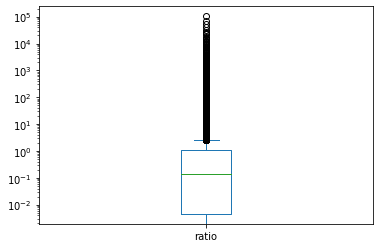

In [9]:
data.ratio.plot.box(logy=True)

Oops, the outlier outscale the range of our data and covering the box and the whiskers. We will use *showfliers=False* keyword to exclude those outliers from our box plot.

<AxesSubplot:>

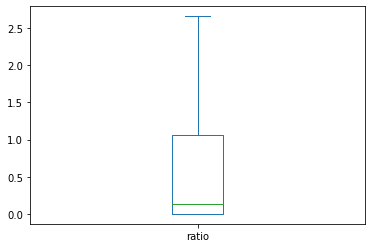

In [10]:
data.ratio.plot.box(showfliers=False)

Here we see that the range of the data is (0, ~2.6), with the median closer to 0, and Q3 slighly above 1. From this, we can see that our data has small range and thus for our analysis, we will exclude data outside the range. We use Tukey's rule to compute our limit for outlier determination.

In [11]:
tuk = float(data.quantile(0.75) + (1.5* (data.quantile(0.75) - data.quantile(0.25))))

Then we filter our data with the limit and store the dataset in a new dataframe filt

In [12]:
filt = data[data['ratio']<=tuk]
filt = filt.reset_index()
filt = filt.drop(columns='index')
filt

,state,ratio
0,failed,0.00000
1,failed,0.08070
2,failed,0.00489
3,failed,0.00020
4,canceled,0.06579
...,...,...
360546,canceled,0.00050
360547,failed,0.10333
360548,failed,0.00133
360549,failed,0.01333


## Measures of Central Tendency

In this section, we want to know the 'central' tendency of our data in form of mean, median, and mode. In particular, we want to know the tendency in our ratio column. These stats can tell us where the data is centered and tells us the distribution.

mean is the expected value of the dataset, or the average of all data combined. We can get the mean of our dataframe with mean() function.

In [13]:
mn = filt.ratio.mean()
mn

0.4783076786363322

Next we will get the median, which is the middle point of our data, with median().

In [14]:
md = filt.ratio.median()
md

0.1048

Lastly, we can get the mode, the most occuring value in the dataframe, by using mode().

In [15]:
mo = filt.ratio.mode()
mo

0    0.0
dtype: float64

We can use histogram to visualize the central tendency

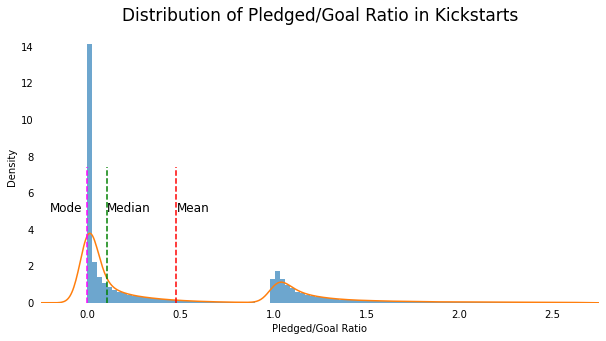

In [16]:
fig, ax = pl.subplots(figsize = (10,5))

filt.ratio.plot(kind = "hist", density = True, alpha = 0.65, bins = 100)
filt.ratio.plot(kind = "kde")

ax.set_xlabel("Pledged/Goal Ratio")
#ax.set_ylabel("")

ax.set_xlim(-0.25,2.75)
#ax.set_yticks([])

ax.axvline(mn, c='r', ls='--', ymax=0.5)
ax.axvline(md, c='g', ls='--', ymax=0.5)
ax.axvline(mo[0], c='magenta', ls='--', ymax=0.5)

ax.text(mn, 5, "Mean", size = 12, alpha = 1)
ax.text(md, 5, "Median", size = 12, alpha = 1)
ax.text(mo-0.2, 5, "Mode", size = 12, alpha = 1)

ax.set_title("Distribution of Pledged/Goal Ratio in Kickstarts", size = 17, pad = 10)

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

pl.show()

From the histogram we see that our data has a bimodal distribution, which means the mean of our data will be placed between the two modes.

## Measures of Variance

Aside from central tendency, we can describe our data distribution by using variance. We will determine the range, interquartile range, variance, and standard deviation using pandas function and simple mathematics

First we want to see the range of our data. Range is defined as all data within our dataset, thus we can get it from subtracting minimum value from maximum value. We use max() and min() function to get the maximum and minimum value in our dataset.

In [17]:
rang = filt.ratio.max() - filt.ratio.min()
display(rang)

2.65667

Variance is a measure of how far the numbers spread from their average value. We will use var() function in pandas to get the variance value of our data.

In [18]:
variance = filt.ratio.var()
variance

0.3640827658614667

Standard deviation is a measure of the amount of variation within the data. A lower standard deviation means the data is distributed near the mean. We use std() function in pandas to calculate our data standard deviation.

In [19]:
stdev = filt.ratio.std()
stdev

0.6033927128010966

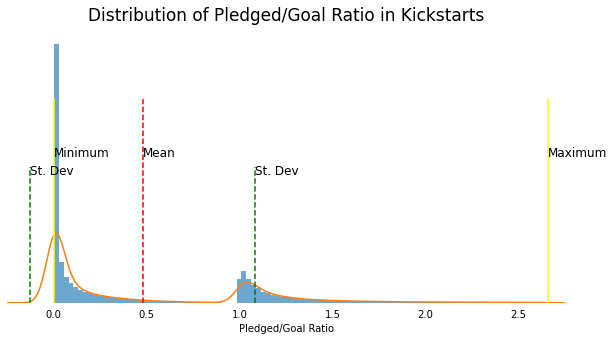

In [20]:
fig, ax = pl.subplots(figsize = (10,5))

filt.ratio.plot(kind = "hist", density = True, alpha = 0.65, bins = 100)
filt.ratio.plot(kind = "kde")

ax.set_xlabel("Pledged/Goal Ratio")
ax.set_ylabel("")

ax.set_xlim(-0.25,2.75)
ax.set_yticks([])

ax.axvline(mn, c='r', ls='--', ymax=0.75)
ax.axvline(mn-stdev, c='g', ls='--', ymax=0.5)
ax.axvline(mn+stdev, c='g', ls='--', ymax=0.5)
ax.axvline(filt.ratio.min(), c='yellow', ymax=0.75)
ax.axvline(filt.ratio.max(), c='yellow', ymax=0.75)

ax.text(mn, 8, "Mean", size = 12, alpha = 1)
ax.text(mn-stdev, 7, "St. Dev", size = 12, alpha = 1)
ax.text(mn+stdev, 7, "St. Dev", size = 12, alpha = 1)
ax.text(filt.ratio.min(), 8, "Minimum", size = 12, alpha = 1)
ax.text(filt.ratio.max(), 8, "Maximum", size = 12, alpha = 1)

ax.set_title("Distribution of Pledged/Goal Ratio in Kickstarts", size = 17, pad = 10)

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

pl.show()

## Hypothesis Testing

In our objective, we want to know whether the ratio of money pledged/goal correlates to the success of a kickstart. To accomodate this, we will define two hypothesis:
 - H0: Successful kickstarts depends on pledged money (correlation between state and pledged column)
 - H1: Successful kickstarts doesn't depend on pledged money (no correlation between state and pledged column)

The null hypothesis states that there is a correlation between the two values, and the alternative says there is no correlation between them. We will use a confidence level of 95%, which means we need a p-value <= 0.05 to accept H0 and reject H1.

Because state column is a category, we will need to change it to numerical values. First we use unique() to see the values we need to change.

In [21]:
filt.state.unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

Next we exchange the catogorical values into numerical values:
 - successful and live kickstarts will be given 1
 - failed, canceled, undefined, and suspended will be given 0

In [22]:
filt.loc[filt['state'] == 'successful','state'] = 1
filt.loc[filt['state'] == 'failed','state'] = 0
filt.loc[filt['state'] == 'canceled','state'] = 0
filt.loc[filt['state'] == 'live','state'] = 1
filt.loc[filt['state'] == 'undefined','state'] = 0
filt.loc[filt['state'] == 'suspended','state'] = 0
filt

,state,ratio
0,0,0.00000
1,0,0.08070
2,0,0.00489
3,0,0.00020
4,0,0.06579
...,...,...
360546,0,0.00050
360547,0,0.10333
360548,0,0.00133
360549,0,0.01333


To see the correlation between ratio and success, we will use pearson correlation coefficient using pearsonr() function in scipy.stats. This function will give the correlation coefficient and the p-value.

In [23]:
correl = st.pearsonr(filt['ratio'],filt['state'])
correl

(0.8939275144957939, 0.0)

The result shows that the correlation coefficient is 0.893 and a p-value of 0. A correlation coefficient value above 0.25 means both columns are highly correlated in positive direction. A p-value below 0.05 which means that we can accept the null hypothesis (both values are correlated) and reject alternative hypothesis (both values are not correlated).

Next we want to see the confidence interval of our data. We will use the bootstrap confidence interval and t.interval() function to calculate it. We use confidence level of 95% so we can be sure 95% of our data will be in this interval if normally distributed.

 - Calculating confidence interval using bootstrap confidence interval: ([reference](http://www2.stat.duke.edu/~ar182/rr/examples-gallery/BootstrapConfidenceIntervals.html))

In [24]:
alpha = 0.05
interval = st.t.ppf(1.0 - (alpha / 2.0),  filt.ratio.size-1) * (stdev / np.sqrt(filt.ratio.size))
ci = (filt.ratio.mean() - interval, filt.ratio.mean() + interval)
ci

(0.47633813205075165, 0.4802772252219128)

 - Calculating condifence interval using t.interval(): ([reference](https://www.kite.com/python/answers/how-to-compute-the-confidence-interval-of-a-sample-statistic-in-python))

In [25]:
cLv = 0.95
dof = filt.ratio.size - 1
sample_standard_error = st.sem(filt.ratio)

conint = st.t.interval(cLv, dof, mn, sample_standard_error)
conint

(0.4763381320507512, 0.48027722522191324)

from both method, we can say that 95% our data is distributed between (0.47633, 0.48027).

## Conclusion

Using measures of central tendency, our data distribution is bimodal, with median and modus leaning towards the left mode. The bimodal distribution drags our mean to be located between the two modes. Measures of variance shows the range of values in ratio column is 2.656 with a variance of 0.364 and standard deviation of 0.603. Excluding the outliers helps us better visualize the data distribution. In hypothesis testing, we can conclude that ratio of pledged money per goal amount is correlated to the success of a kickstart. The confidence interval is rather small within (0.476 - 0.480) with a mean of 0.478, while the graph in measures of central tendency showing that the data is concentrated near the mode.